In [21]:
from torchvision import datasets, models, transforms, utils
from vocparseclslabels import PascalVOC
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import numpy as np
from PIL import Image
from torchvision.transforms import ToTensor
from torch.autograd import Variable


In [26]:
model = models.resnet18(pretrained=True) # pretrained resnet18
new_lin = torch.nn.Sequential(
    torch.nn.Linear(512, 20),
    torch.nn.Sigmoid()
)
model.fc = new_lin

In [3]:
# Custom loss function which is essentially a weighted binary cross entropy loss
class BCE_custom(nn.modules.loss._Loss):
    def __init__(self, reduction: str = "mean") -> None:
        super(BCE_custom, self).__init__()
        self._reduction = reduction
        self._BCE = nn.BCELoss(reduction = 'none') # Binary cross entropy for calculating cross entropy of every class prediction

    def forward(self, input_: Tensor, target: Tensor) -> Tensor:
        BCE_vec = self._BCE(input_, target)
        trues = torch.mean(BCE_vec[target.bool()]) # average loss where there should be a label
        falses = torch.mean(BCE_vec[~target.bool()]) # average loss where there should not be a label
        return trues + falses # this way guessing 0 for all is only 50% correct

In [19]:
trvaltest = 0
trvaltest_choice = ["train", "val", "test"][trvaltest]
trvaltest_choice

'train'

In [3]:
img_dir = "data/VOCdevkit/VOC2012/JPEGImages/"
pVOC = PascalVOC("data/VOCdevkit/VOC2012/")

In [4]:
#pVOC.list_image_sets()

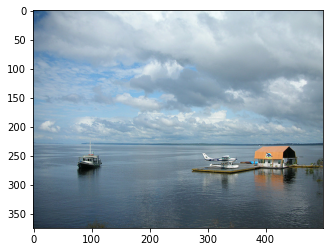

In [5]:
img = mpimg.imread("data/VOCdevkit/VOC2012/JPEGImages/" + "2008_003275.jpg")
imgplot = plt.imshow(img)
plt.show()

In [6]:
def im2tensor(im_name):
    img_path = img_dir + im_name +".jpg"
    image = Image.open(img_path)
    image = ToTensor()(image).unsqueeze(0)
    image = Variable(image)
    return image

In [8]:
X_train = []
Y_train = []

In [20]:
im_dict = {}
for i, im_class in enumerate(pVOC.list_image_sets()):
    files = pVOC.imgs_from_category_as_list(im_class, "train")
    for file in files:
        if file in im_dict:
            im_dict[file][i] = 1
        else:
            im_dict[file] = np.zeros(20)
            im_dict[file][i] = 1

for key in im_dict:
    X_train.append(key)
    Y_train.append(im_dict[key])

In [31]:
print(Y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
model.forward(X_train[0])

TypeError: forward() missing 1 required positional argument: 'target'

In [40]:
dataiter = iter(dataloaders["train"])
data = dataiter.next()
images = data["image"].to(device)
labels = data["label"].to(device)

label_mdl = model.forward(images)

In [41]:
d = 0

In [42]:
label_mdl[d]

tensor([3.4008e-05, 1.3493e-05, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.7111e-05, 1.0000e+00, 1.0288e-05, 1.0000e+00, 1.8846e-05, 5.0494e-05,
        1.0000e+00, 1.0000e+00, 2.1237e-04, 6.6071e-02, 1.0000e+00, 9.9949e-01,
        1.0000e+00, 9.9987e-01], device='cuda:0', grad_fn=<SelectBackward>)

In [43]:
(label_mdl[d] > 0.5).int()

tensor([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       device='cuda:0', dtype=torch.int32)

In [44]:
labels[d]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.], device='cuda:0')

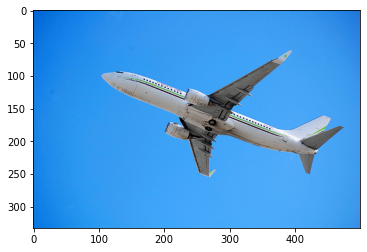

In [35]:
img = mpimg.imread("data/VOCdevkit/VOC2012/JPEGImages/" + data["filename"][d] + ".jpg")
imgplot = plt.imshow(img)
plt.show()